# <center> Project-3. ИССЛЕДОВАНИЕ ДАННЫХ Booking

## Постановка задачи

Одна из проблем компании *Booking* -  это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Поставлена задача - создать такую модель.


### КРИТЕРИИ ОЦЕНИВАНИЯ:

- Качество кода (соблюдение стандартов оформления PEP-8, комментирование кода, README к проекту). Оформление проекта на GitHub, GitLab, Kaggle.
- Очистка данных.
- Исследование данных (качество визуализации, наличие идей, гипотез, комментариев).
- Генерация признаков.
- Отбор признаков.
- Преобразование признаков.
- Качество решения: результат метрики MAPE.


Данные содержат следующие столбцы:
*   *hotel_address* — адрес отеля;
*   *review_date* — дата, когда рецензент разместил соответствующий отзыв;
*   *average_score* — средний балл отеля, рассчитанный на основе последнего комментария за последний год; 
*   *hotel_name* — название отеля;
*   *reviewer_nationality* — страна рецензента;
*   *negative_review* — отрицательный отзыв, который рецензент дал отелю;
*   *review_total_negative_word_counts* — общее количество слов в отрицательном отзыв;
*   *positive_review* — положительный отзыв, который рецензент дал отелю;
*   *review_total_positive_word_counts* — общее количество слов в положительном отзыве.
*   *reviewer_score* — оценка, которую рецензент поставил отелю на основе своего опыта;
*   *total_number_of_reviews_reviewer_has_given* — количество отзывов, которые рецензенты дали в прошлом.
*   *total_number_of_reviews* — общее количество действительных отзывов об отеле;
*   *tags* — теги, которые рецензент дал отелю;
*   *days_since_review* — количество дней между датой проверки и датой очистки;
*   *additional_number_of_scoring* —  есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.;
*   *lat* — географическая широта отеля;
*   *lng* — географическая долгота отеля;

Оригинальный датасет: ["hotels.csv” (drive.google.com)](https://drive.google.com/file/d/1Qj0iYEbD64eVAaaBylJeIi3qvMzxf2C_/view)

## Загрузка и обработка данных

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce # импорт для работы с кодировщиком

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [3]:
hotels = pd.read_csv('./data/hotels_train.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [5]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [6]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

В датасете 386803 записей. В столбцах lat и lng есть пропуски.

### Проверям датасет на наличие пропусков и дубликатов, а также на корректность типов данных столбцов.


Проанализируем пропуски:

In [7]:
cols_null_percent = hotels.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lat    0.63288
lng    0.63288
dtype: float64

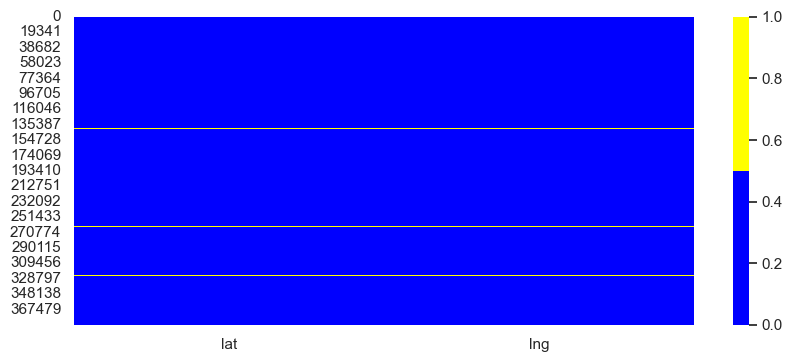

In [8]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    hotels[cols].isnull(),
    cmap=sns.color_palette(colors),
)

*Вывод:* Видим, что пропуски в данных относятся к определенным записям lat, lng.  Их величина составляет 0,63% - мы можем пренеберечь этими записями, либо найти полное соотвествие.

Проверим данные на наличие полных дубликатов:

In [9]:
print('Количество дубликатов: {}'.format(hotels[hotels.duplicated()].shape[0]))

# Удаляем дубликаты:
data = hotels.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 307
Размер таблицы после удаления дубликатов: (386496, 17)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 10  r

### Статистические характеристики каждого из признаков

#### **hotel_address**

In [11]:
data['hotel_address'].describe()

count                                                386496
unique                                                 1493
top       163 Marsh Wall Docklands Tower Hamlets London ...
freq                                                   3587
Name: hotel_address, dtype: object

- Тип данных: object
- уникальных значений: 1493


#### **additional_number_of_scoring**

In [12]:
data['additional_number_of_scoring'].describe().round()

count    386496.0
mean        499.0
std         500.0
min           1.0
25%         169.0
50%         342.0
75%         660.0
max        2682.0
Name: additional_number_of_scoring, dtype: float64

- тип данных: float64
- среднее количество: 499.0
- стандартное отклонение: 500.0


**Вывод: есть выбросы в данных**

#### **review_date**

In [13]:
data['review_date'].value_counts()

review_date
8/2/2017      1910
9/15/2016     1734
4/5/2017      1702
8/30/2016     1458
2/16/2016     1450
              ... 
12/3/2016      154
1/22/2016      153
11/27/2015     146
4/1/2017       127
4/2/2017       110
Name: count, Length: 731, dtype: int64

- Тип данных: datetime


#### **hotel_name**

In [14]:
data['hotel_name'].describe()

count                                         386496
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

 - тип данных: object
 - уникальных значений: 1492
 - самая популярная вакансия: Britannia International Hotel Canary Wharf
 - количество упоминаний популярной вакансии: 3587

#### **reviewer_nationality**

In [15]:
data['reviewer_nationality'].describe()

count               386496
unique                 225
top        United Kingdom 
freq                183952
Name: reviewer_nationality, dtype: object

 - тип данных: object
 - уникальных значений: 225
 - самая популярная: United Kingdom
 - количество упоминаний: 183952

 **Вывод: большая часть UK**

#### **negative_review**

In [16]:
data['negative_review'].describe()


count          386496
unique         248828
top       No Negative
freq            95833
Name: negative_review, dtype: object

 - тип данных: object
 - уникальных: 248828 (65%)
 - не уникальных: 137668 (35%)
 - top: No Negative (24.8%)

 **Вывод: большая часть не уникальных данных**

#### **review_total_negative_word_counts**

In [17]:
data['review_total_negative_word_counts'].describe().round()

count    386496.0
mean         19.0
std          30.0
min           0.0
25%           2.0
50%           9.0
75%          23.0
max         408.0
Name: review_total_negative_word_counts, dtype: float64

- тип данных: float64
- среднее количество: 19
- стандартное отклонение: 30


**Вывод: есть выбросы в данных**

#### **total_number_of_reviews**

In [18]:
data['total_number_of_reviews'].describe().round().to_frame()


,total_number_of_reviews
count,386496.0
mean,2745.0
std,2317.0
min,43.0
25%,1161.0
50%,2134.0
75%,3633.0
max,16670.0


- тип данных: float64
- среднее количество: 2745.0
- стандартное отклонение: 2317.0


**Вывод: есть выбросы в данных**

#### **positive_review**

In [19]:
data['positive_review'].describe()

count          386496
unique         311737
top       No Positive
freq            26863
Name: positive_review, dtype: object

 - уникальных значений более: 81%
 - топопый отзыв: No Positive (26863 записи)

#### **review_total_positive_word_counts**

In [20]:
data['review_total_positive_word_counts'].describe()

count    386496.000000
mean         17.778163
std          21.724766
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: review_total_positive_word_counts, dtype: float64

- тип данных: float64
- среднее количество: 17.77
- стандартное отклонение: 21


**Вывод: есть выбросы в данных**

#### **total_number_of_reviews_reviewer_has_given**

In [21]:
data['total_number_of_reviews_reviewer_has_given'].describe()

count    386496.000000
mean          7.176211
std          11.052453
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: total_number_of_reviews_reviewer_has_given, dtype: float64

- тип данных: float64
- среднее значение: 7.17
- стандартное отклонение: 11


**Вывод: есть выбросы в данных**

#### **reviewer_score**

In [22]:
data['reviewer_score'].describe()

count    386496.000000
mean          8.397299
std           1.635747
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: reviewer_score, dtype: float64

#### **tags**

In [23]:
data['tags'].describe()

count                                                386496
unique                                                47135
top       [' Leisure trip ', ' Couple ', ' Double Room '...
freq                                                   3853
Name: tags, dtype: object

- тип данных: object
- уникальных значений: 47135
- Топ: Leisure trip


#### days_since_review

In [24]:
data['days_since_review'].describe()

count     386496
unique       731
top       1 days
freq        1910
Name: days_since_review, dtype: object

 - уникальных: 731 (0.2%)
 - не уникальных: 99%
**Вывод: большое количество неуникальных данных**

# 2. Разведывательный анализ данных

## 2.1 Визуальный анализ данных

### 2.1.1 Числовые признаки

##### Распреределение целевого reviewer_score

In [25]:
data['reviewer_score'].median()

8.8

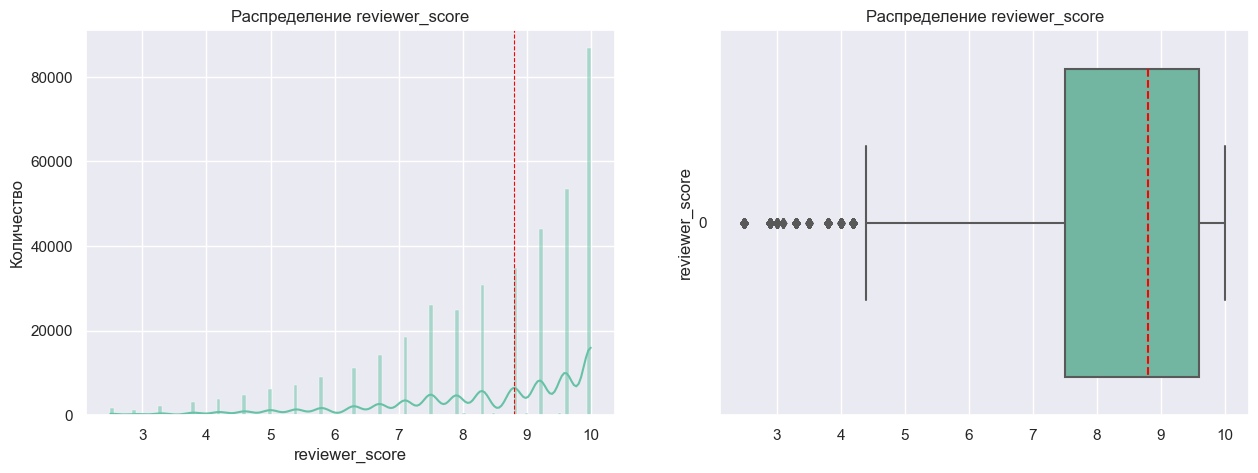

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['reviewer_score'], kde=True, ax=axes[0])
axes[0].set(xlabel='reviewer_score', ylabel='Количество')
axes[0].set_title('Распределение reviewer_score')
axes[0].axvline(data['reviewer_score'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['reviewer_score'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='reviewer_score')
axes[1].set_title('Распределение reviewer_score')

plt.show()

In [27]:
data_rs = data['reviewer_score'].describe().round(2).to_frame()
data_rs.columns = ['reviewer_score']
data_rs

,reviewer_score
count,386496.00
mean,8.40
std,1.64
min,2.50
25%,7.50
50%,8.80
75%,9.60
max,10.00


**Вывод: Распределение reviewer_score отлично от нормального, имеются выбросы.**

##### Распреределение average_score

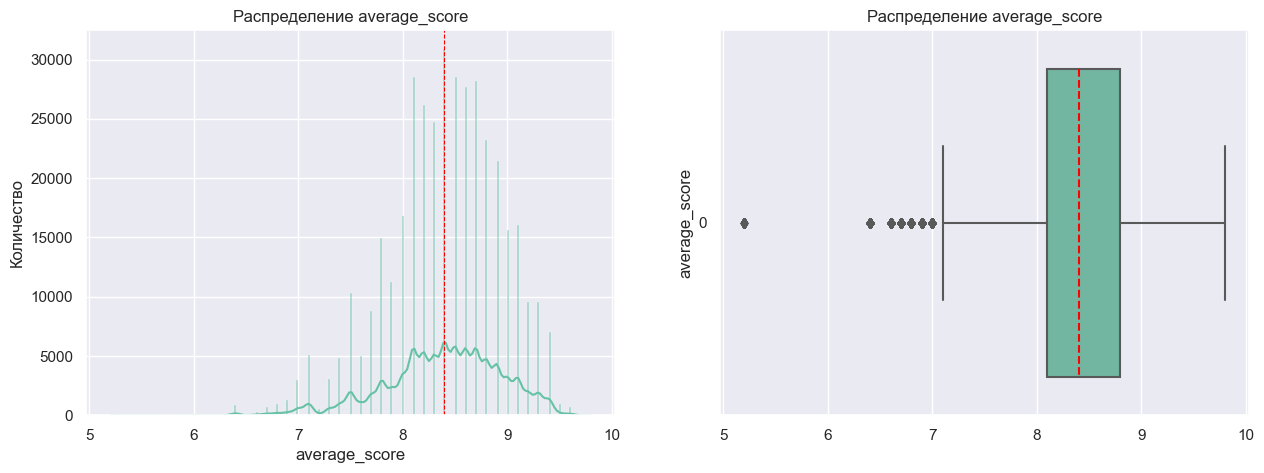

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['average_score'], kde=True, ax=axes[0])
axes[0].set(xlabel='average_score', ylabel='Количество')
axes[0].set_title('Распределение average_score')
axes[0].axvline(data['average_score'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['average_score'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='average_score')
axes[1].set_title('Распределение average_score')

plt.show()

In [29]:
data_as = data['average_score'].describe().round(2).to_frame()
data_as.columns = ['average_score']
data_as

,average_score
count,386496.00
mean,8.40
std,0.55
min,5.20
25%,8.10
50%,8.40
75%,8.80
max,9.80


**Вывод: Распределение average_score отлично от нормального, имеются выбросы.**

#####  Распределение *review_total_negative_word_counts* — общее количество слов в отрицательном отзыв;

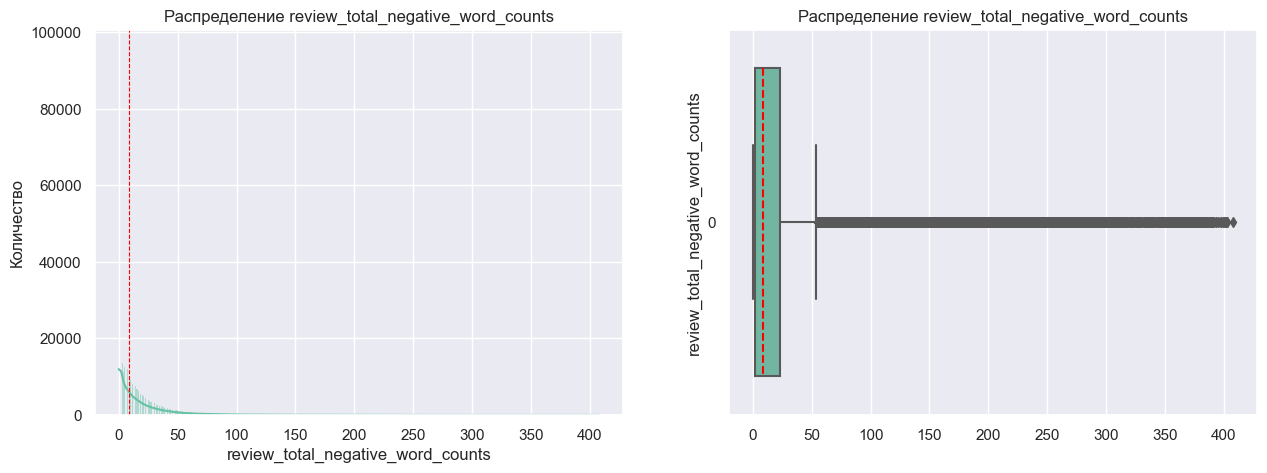

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['review_total_negative_word_counts'], kde=True, ax=axes[0])
axes[0].set(xlabel='review_total_negative_word_counts', ylabel='Количество')
axes[0].set_title('Распределение review_total_negative_word_counts')
axes[0].axvline(data['review_total_negative_word_counts'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['review_total_negative_word_counts'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='review_total_negative_word_counts')
axes[1].set_title('Распределение review_total_negative_word_counts')

plt.show()

In [31]:
data_tnwc = data['review_total_negative_word_counts'].describe().round(2).to_frame()
data_tnwc.columns = ['review_total_negative_word_counts']
data_tnwc

,review_total_negative_word_counts
count,386496.00
mean,18.54
std,29.70
min,0.00
25%,2.00
50%,9.00
75%,23.00
max,408.00


**Вывод: Распределение review_total_negative_word_counts отлично от нормального, имеются выбросы.**

#####  Распределение  *review_total_positive_word_counts* — общее количество слов в положительном отзыве.

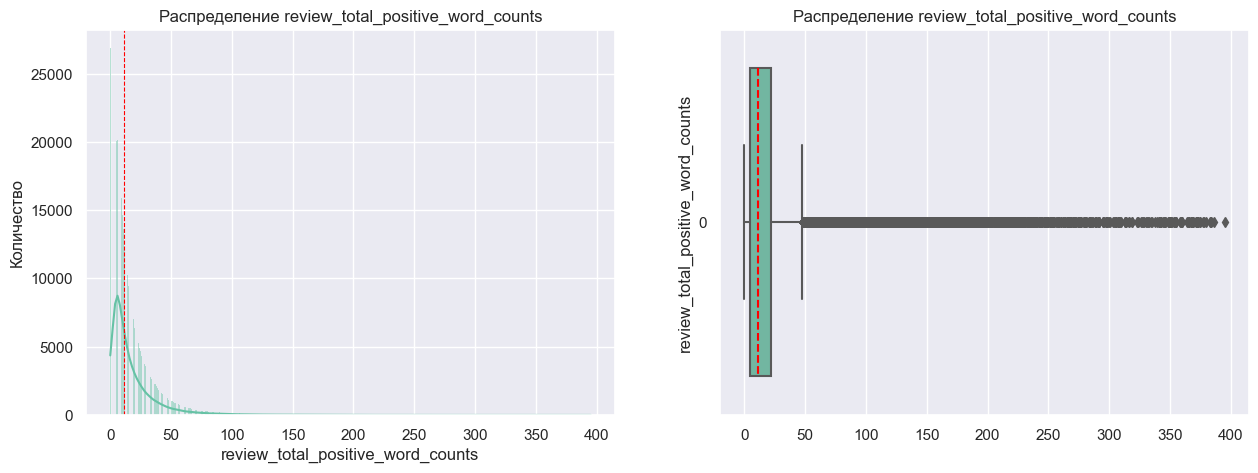

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['review_total_positive_word_counts'], kde=True, ax=axes[0])
axes[0].set(xlabel='review_total_positive_word_counts', ylabel='Количество')
axes[0].set_title('Распределение review_total_positive_word_counts')
axes[0].axvline(data['review_total_positive_word_counts'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['review_total_positive_word_counts'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='review_total_positive_word_counts')
axes[1].set_title('Распределение review_total_positive_word_counts')

plt.show()

In [33]:
data_tpwc = data['review_total_positive_word_counts'].describe().round(2).to_frame()
data_tpwc.columns = ['review_total_positive_word_counts']
data_tpwc

,review_total_positive_word_counts
count,386496.00
mean,17.78
std,21.72
min,0.00
25%,5.00
50%,11.00
75%,22.00
max,395.00


**Вывод: Распределение review_total_positive_word_counts отлично от нормального, имеются выбросы.**

#####  Распределение  *total_number_of_reviews_reviewer_has_given* — количество отзывов, которые рецензенты дали в прошлом.

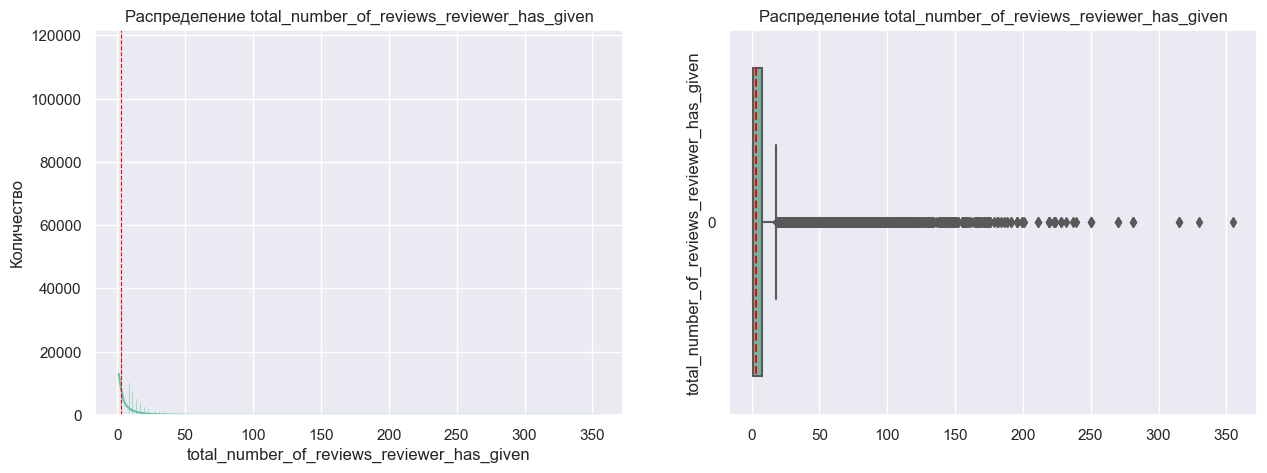

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['total_number_of_reviews_reviewer_has_given'], kde=True, ax=axes[0])
axes[0].set(xlabel='total_number_of_reviews_reviewer_has_given', ylabel='Количество')
axes[0].set_title('Распределение total_number_of_reviews_reviewer_has_given')
axes[0].axvline(data['total_number_of_reviews_reviewer_has_given'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['total_number_of_reviews_reviewer_has_given'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='total_number_of_reviews_reviewer_has_given')
axes[1].set_title('Распределение total_number_of_reviews_reviewer_has_given')

plt.show()

In [35]:
data_total_num = data['total_number_of_reviews_reviewer_has_given'].describe().round(2).to_frame()
data_total_num.columns = ['total_number_of_reviews_reviewer_has_given']
data_total_num

,total_number_of_reviews_reviewer_has_given
count,386496.00
mean,7.18
std,11.05
min,1.00
25%,1.00
50%,3.00
75%,8.00
max,355.00


**Вывод: Распределение total_number_of_reviews_reviewer_has_given отлично от нормального, имеются выбросы.**

#####  Распределение  *total_number_of_reviews* — общее количество действительных отзывов об отеле;

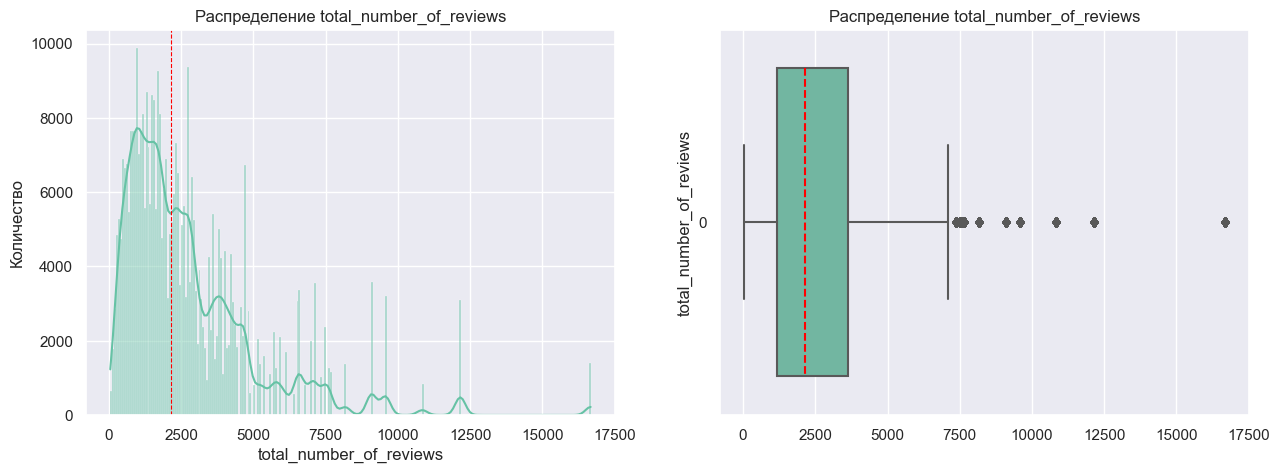

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['total_number_of_reviews'], kde=True, ax=axes[0])
axes[0].set(xlabel='total_number_of_reviews', ylabel='Количество')
axes[0].set_title('Распределение total_number_of_reviews')
axes[0].axvline(data['total_number_of_reviews'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['total_number_of_reviews'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='total_number_of_reviews')
axes[1].set_title('Распределение total_number_of_reviews')

plt.show()

In [37]:
data_total_num_rev = data['total_number_of_reviews'].describe().round(2).to_frame()
data_total_num_rev.columns = ['total_number_of_reviews']
data_total_num_rev

,total_number_of_reviews
count,386496.00
mean,2744.68
std,2316.93
min,43.00
25%,1161.00
50%,2134.00
75%,3633.00
max,16670.00


**Вывод: Распределение total_number_of_reviews отлично от нормального, имеются выбросы.**

#####  Распределение  *additional_number_of_scoring* —  есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.;

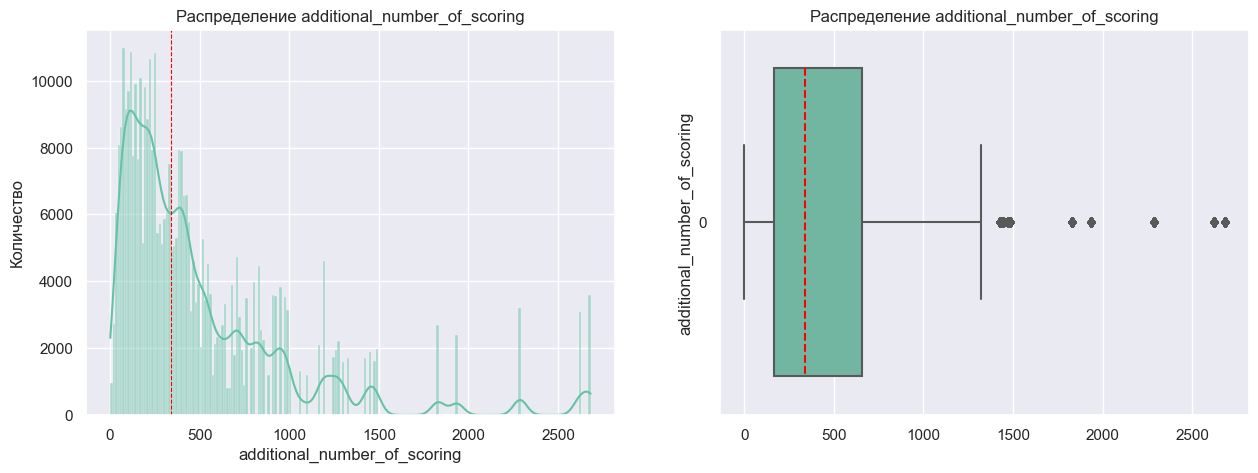

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['additional_number_of_scoring'], kde=True, ax=axes[0])
axes[0].set(xlabel='additional_number_of_scoring', ylabel='Количество')
axes[0].set_title('Распределение additional_number_of_scoring')
axes[0].axvline(data['additional_number_of_scoring'].median(), color='red', linestyle='--', linewidth=0.8)
#axes[0].axvline(data['salary_in_usd'].mode(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['additional_number_of_scoring'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='additional_number_of_scoring')
axes[1].set_title('Распределение additional_number_of_scoring')

plt.show()

In [39]:
data_add_num_scor = data['additional_number_of_scoring'].describe().round(2).to_frame()
data_add_num_scor.columns = ['additional_number_of_scoring']
data_add_num_scor

,additional_number_of_scoring
count,386496.00
mean,498.50
std,500.37
min,1.00
25%,169.00
50%,342.00
75%,660.00
max,2682.00


**Вывод: Распределение additional_number_of_scoring отлично от нормального, имеются выбросы.**

### 2.1.2 Категориальные признаки

##### *hotel_address* — адрес отеля;

 - Преобразуем *hotel_address* — адрес отеля, в 2 признака - hotel_country, hotel_city

In [ ]:
def get_country(arg):
    """Функция возвращает название страны из строки адреса

    Args:
        arg (str): адрес отеля

    Returns:
        str: название страны
    """
    arg_list = arg.split(' ')
    arg_type = arg_list[-1]
    if arg_type == 'Kingdom':
        arg_type = 'UK'
    return arg_type

data['hotel_country'] = data['hotel_address'].apply(get_country)

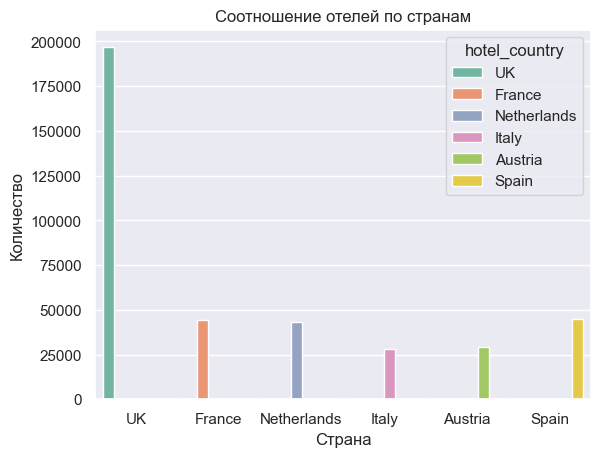

In [41]:
#hotel_country
ax = sns.countplot(data=data, x=data['hotel_country'], hue='hotel_country')
ax.set(xlabel='Страна', ylabel='Количество')
plt.title('Соотношение отелей по странам')
plt.show()

**Вывод:Чаще встречаются отели из UK**

In [ ]:
def get_city(arg):
    """Функция возвращает название города в признаке hotel_address

    Args:
        arg (str): адресс отеля

    Returns:
        str: название города
    """
    arg_list = arg.split(' ')
    arg_type = arg_list[-2]
    if arg_type == 'United':
        arg_type = arg_list[-5]
    return arg_type

data['hotel_city'] = data['hotel_address'].apply(get_city)

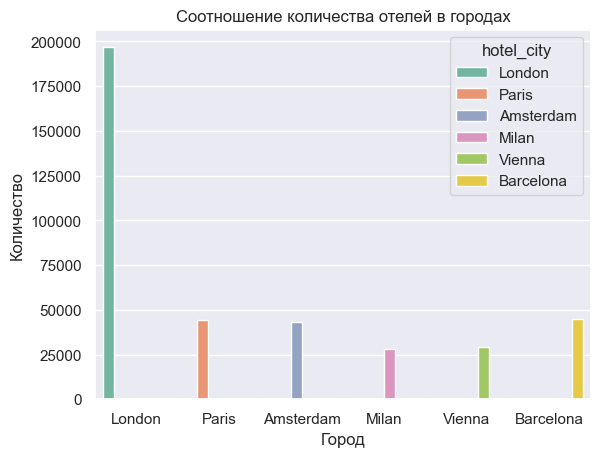

In [43]:
#hotel_city
ax = sns.countplot(data=data, x=data['hotel_city'], hue='hotel_city')
ax.set(xlabel='Город', ylabel='Количество')
plt.title('Соотношение количества отелей в городах')
plt.show()

**Вывод:Чаще встречаются отели из Лондона**

##### *review_date* — дата, когда рецензент разместил соответствующий отзыв;

- Изменим тип данных *review_date* на *datetime*
- Преобразуем в 3 дополнительных признака - year, month, day

In [ ]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['year'] = data['review_date'].dt.year
data['month'] = data['review_date'].dt.month
data['day'] = data['review_date'].dt.day

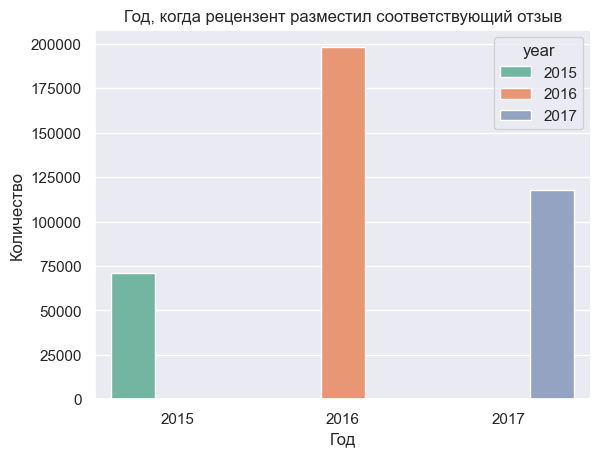

In [45]:
#year
ax = sns.countplot(data=data, x=data['year'], hue='year')
ax.set(xlabel='Год', ylabel='Количество')
plt.title('Год, когда рецензент разместил соответствующий отзыв')
plt.show()

**Вывод:Чаще встречаются 2016**

In [ ]:
def get_season(arg):
    """Функция возвращает время года когда был оставлен отзыв

    Args:
        arg (int): месяц года

    Returns:
        str: Время года
    """
    sum_list = [6,7,8]
    spring_list = [3,4,5]
    atum_list = [9,10,11]
    winter_list = [1,2,12]
    arg_type = ''
    if arg in sum_list:
        arg_type = 'Лето'
    if arg in spring_list:
        arg_type = 'Весна'
    if arg in atum_list:
        arg_type = 'Осень'
    if arg in winter_list:
        arg_type = 'Зима'
    
    return arg_type

data['season_review'] = data['month'].apply(get_season)

In [47]:
#season_review
df_rev_season = data['season_review'].value_counts()
df_rev_season = pd.DataFrame(df_rev_season)
df_rev_season = df_rev_season.groupby(df_rev_season.index, sort=False, as_index=True).sum()

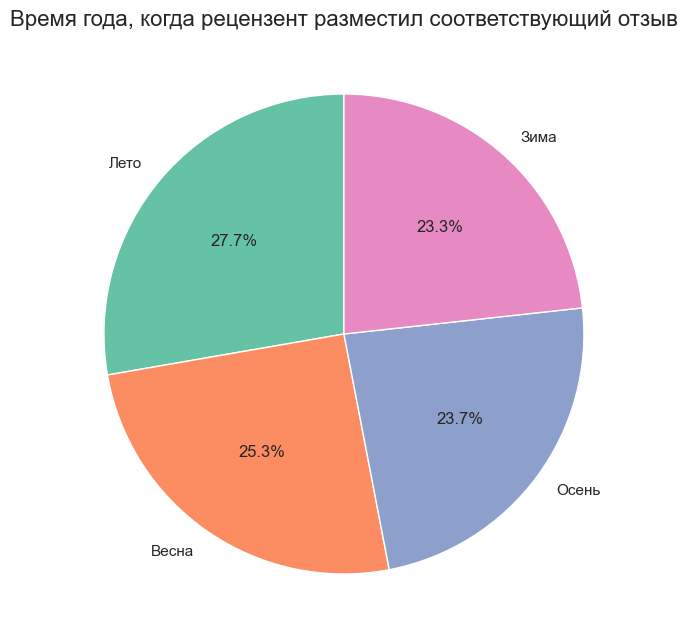

In [48]:
#season_review

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    df_rev_season['count'],
    labels=df_rev_season.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Время года, когда рецензент разместил соответствующий отзыв', fontsize=16)
plt.show(pie)

**Вывод:Чаще рецензенты оставляют отзывы Лето и Весной, чуть реже Осенью и Зимой**

In [49]:
#reviewer_nationality
df_rev_nat = data['reviewer_nationality'].value_counts()
df_rev_nat = pd.DataFrame(df_rev_nat)
#df_rev_nat.head(20)
df_rev_nat.index = df_rev_nat.apply(lambda x: x.name if x.values > 2900 else 'Прочее', axis=1)
df_rev_nat = df_rev_nat.groupby(df_rev_nat.index, sort=False, as_index=True).sum()


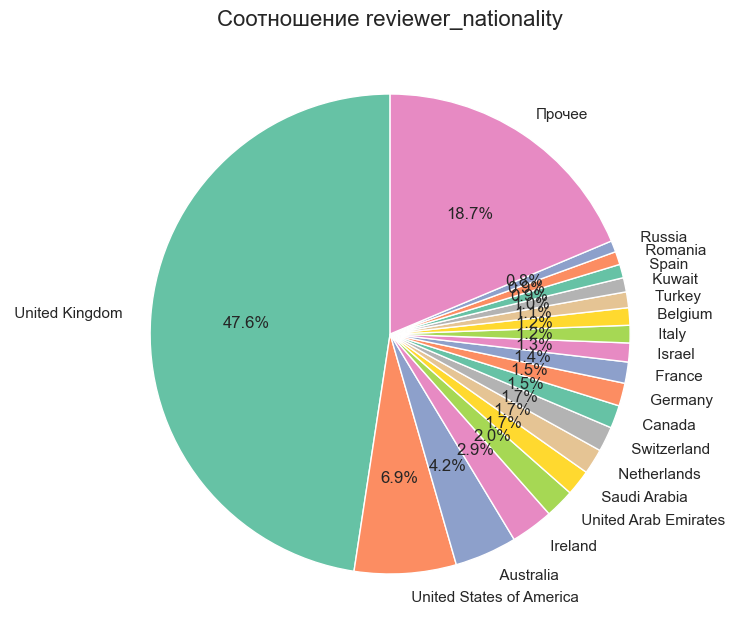

In [50]:
#reviewer_nationality

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    df_rev_nat['count'],
    labels=df_rev_nat.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Соотношение reviewer_nationality', fontsize=16)
plt.show(pie)


**Вывод: Основные reviewer_nationality - UK**

##### *hotel_name* — название отеля;

In [51]:
#hotel_name
df_hotel_name = data['hotel_name'].value_counts().head(20)
df_hotel_name = pd.DataFrame(df_hotel_name)
#df_hotel_name.head(20)
df_hotel_name.index = df_hotel_name.apply(lambda x: x.name if x.values > 1000 else 'Прочее', axis=1)
df_hotel_name = df_hotel_name.groupby(df_hotel_name.index, sort=False, as_index=True).sum()


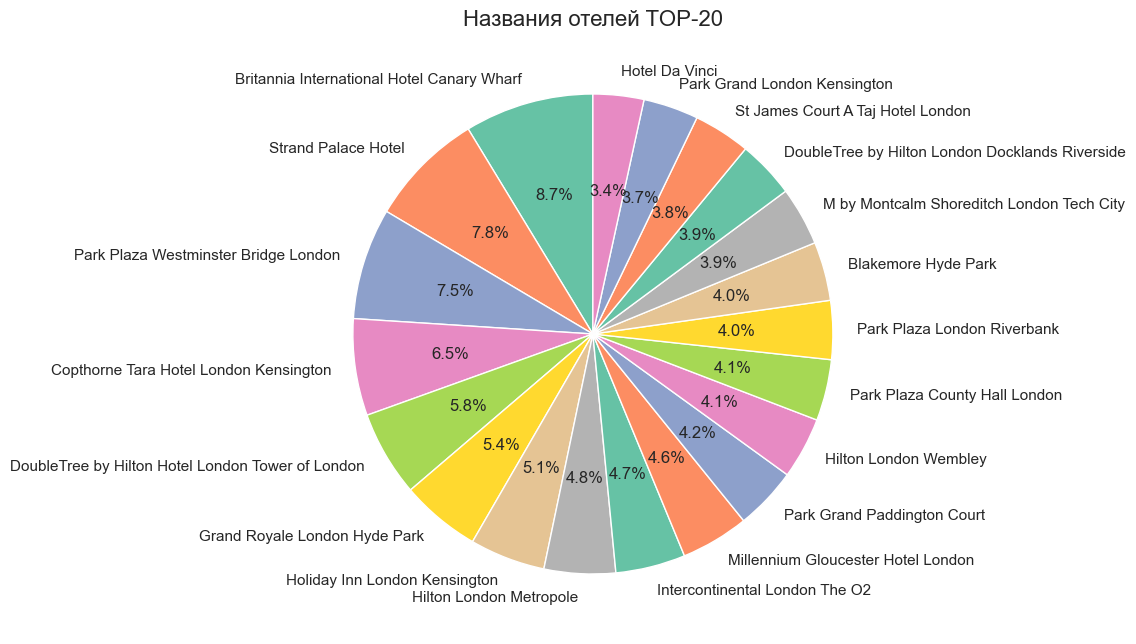

In [52]:
#hotel_name
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    df_hotel_name['count'],
    labels=df_hotel_name.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Названия отелей TOP-20', fontsize=16)
plt.show(pie)

**Вывод: В топе отелей фигуригует город London, при создании новых признаков стоит учесть, что слово 'London' менее информативно и не уникально для этих данных**

##### *tags* — теги, которые рецензент дал отелю;

Сколько уникальных тегов представлено в наборе данных?

In [ ]:
#преобразуем tags в список значений 
data['tags'] = data['tags'].apply(lambda x: x[1:-1].split(','))

In [54]:
#определяем количество уникальных тегов
def get_all_tags_set(df):
    """Функция возвращает всё множество тэгов

    Args:
        df (dataframe): dataframe

    Returns:
        set: result
    """
    result = set()
    for each in df['tags']:
        #ready_list = [x.strip() for x in each.split(',')]
        result.update(x.strip() for x in each)
    return result

def get_all_tags_list(df):
    """Функция возвращает список всех тэгов

    Args:
        df (dataframe): dataframe

    Returns:
        list: result
    """
    result = list()
    for each in df['tags']:
        #
        result.extend(x.strip() for x in each)
    return result


Сколько уникальных тегов представлено в наборе данных?

In [55]:
#получаем множество всех тэгов
all_tags = get_all_tags_set(data)    
all_tags_set = list(all_tags)
display(len(all_tags))
#получаем список всех упоминаемых тэгов
all_tags_list = get_all_tags_list(data)    
#

df_all_tags = pd.DataFrame(all_tags_list)
#оцениваем количество упоминанний
df_tags = df_all_tags[0].value_counts()
df_tags_val = pd.DataFrame(df_tags)
#формируем словарь тегов с количество упоминаний
tags_dict = df_tags_val['count'].to_dict()
#готовим таблицу для визуализации количества 12 упоминаемых тэгов
df_tags_top20 = df_all_tags[0].value_counts().head(12)
df_tags_top20 = pd.DataFrame(df_tags_top20)
#df_tags_top20.index = df_tags_top20.apply(lambda x: x.name if x.values > 24000 else 'Прочее', axis=1)
df_tags_top20 = df_tags_top20.groupby(df_tags_top20.index, sort=False, as_index=True).sum()


2368

Какой тег представлен в наибольшем числе отзывов?

In [56]:
df_tags_top20.index[0]

"' Leisure trip '"

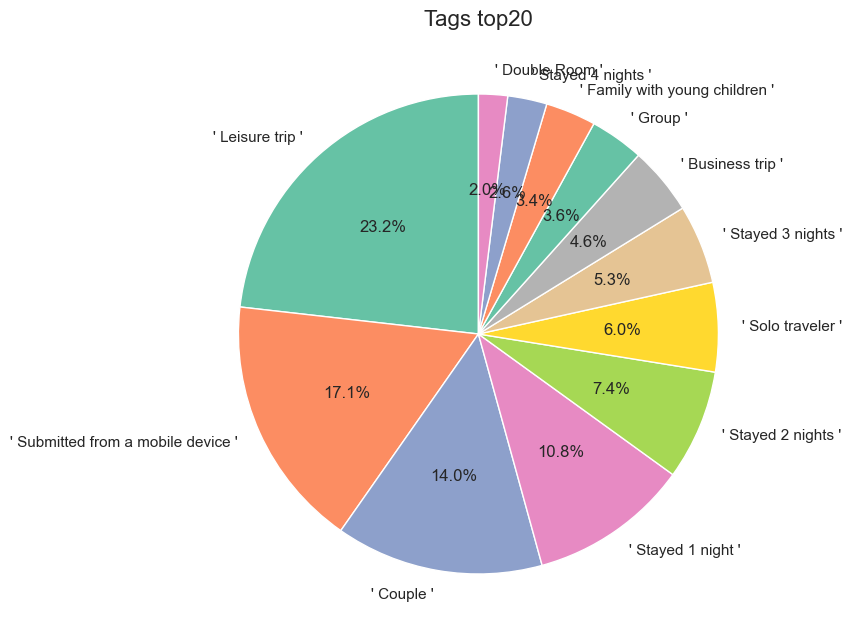

In [57]:
#tags
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    df_tags_top20['count'],
    labels=df_tags_top20.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Tags top20', fontsize=16)
plt.show(pie)

In [58]:
# создаем признак tags_num, формируем из количества
data_tags_num = data['tags'].apply(len) 
# оцениваем количество тегов в отзывах
data_tags_num.value_counts()

tags
5    223293
4    158448
3      4122
6       563
2        65
1         5
Name: count, dtype: int64

**Вывод:** 
 - Самый распространенный тэг - ' Leisure trip '
 - чаще в отзывах указывают 5 тэгов

#####  *negative_review* — отрицательный отзыв, который рецензент дал отелю;

In [59]:
# средее количество слов в негативном отзыве
data_neg_num = data['negative_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(data_neg_num.mean())

19

##### *positive_review* — положительный отзыв, который рецензент дал отелю;

In [60]:
# средее количество слов в негативном отзыве
data_pos_num = data['positive_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(data_pos_num.mean())

18

# 3. Генерация признаков

**План по генерации и отбору признаков, исходя из анализа:**
 1. Заполним пустые значение призанков lng, lat через геокодинг карт yandex.
 2. hotel_address - создаем 2 признака - hotel_country и hotel_city, далее кодируем их через бинарное кодирование.
 3. review_date - Преобразуем в 3 дополнительных признака - year, month, day
 4. tags - Из списка 12 популярных тегов через OneHotCoding создаем признаки для каждого тега.
 5. days_since_review - преобразуем с помощью функции в int64, созадем признак days_since_review_val
 6. reviewer_nationality - кодируем через бинарное кодирование
 7. hotel_name - кодируем имена отелей через сумму количества популярных слов в их названии, создаем признак hn_wrds_val
 8. создаем копию основной таблицы, чтобы можно было удалить object признаки и сформировать таблицу корреляции.
 9. удаляем дубликаты и признаки object
 10. создаем таблицу корреляции из преобразованных признаков и удаляем мультиколлинерные признаки.
 
**Далее кодируем признаки negative_review и positive_review:**
 
 11. Чтобы охватить большее количество уникальных строк, делим данные по принципу:
    - если review_total_negative_word_counts > review_total_positive_word_counts - значит отзывы в большей степени негативные;
    - если review_total_negative_word_counts < review_total_positive_word_counts - значит отзывы в большей степени позитивные;
 12. Далее формируем словарь для кодирования отдельно negative_review и positive_review, основываясь на количестве упоминаний слов.
   - слова подбираем не только по популярности, но и по информативности - условно слово должно одназначно идентифицировать отзыв
   Пример: 'very bad' и 'very good', при создании признака 'very' мы можем получить дубликаты разных по смыслу отзывов, поэтому мы считаем, что 'very' слово не информативное и исключаем его из словаря для преобразования
  

#### *1. Заполним пустые значение призанков lng, lat через геокодинг карт yandex.*

закоментированый код указан для примера, так как требует API_KEY и выполнение его возможно при условии регистрации на maps.yandex.ru, для получения функционала геокодинга.
Инструкция доступна по ссылке: https://yandex.cloud/ru/docs/datalens/tutorials/data-from-ch-geocoder?

In [ ]:
"""
@dataclass
class YandexGeocoder:
    api_key: str
    geocoder_url: str = 'https://geocode-maps.yandex.ru/1.x'

    def adress_to_geopoint(self, address: str) -> str:

        # Преобразование адреса в геокоординаты

        response = requests.get(self.geocoder_url, params={
            'apikey': self.api_key,
            'geocode': address,
            'format': 'json',
        }, headers={'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()

        result = response.json()['response']['GeoObjectCollection']['featureMember']
        if not result:
            return None

        lat, lon = result[0]['GeoObject']['Point']['pos'].split(' ')
        return self._to_datalens_format(lon, lat)
    
    def _to_datalens_format(self, lon, lat):
        return [lon,lat]
"""

In [62]:
#формируем hotels_data с адресами где не указаны координаты
hotels_data = pd.DataFrame(hotels[hotels['lat'].isnull()]['hotel_address'], dtype=str)
hotels_data.head(3)

,hotel_address
122,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria
566,23 Rue Damr mont 18th arr 75018 Paris France
724,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...


In [ ]:
#получаем уникальный список адресов
"""
hotels_addres_wo_geo = hotels_data['hotel_address'].value_counts()
h_add_wo_geo =pd.DataFrame(hotels_addres_wo_geo.index)
h_add_wo_geo
"""

In [ ]:
#создаем экземпляр класса YandexGeocoder и итеративно проходимся по списку адресов, записывая координаты в соотвествующие признаки
"""
geocoder = YandexGeocoder(api_key='API_KEY')

for index, row in h_add_wo_geo.iterrows():
    adress = row['hotel_address']
    geo = geocoder.adress_to_geopoint(adress)
    h_add_wo_geo.loc[index,'lat'] = geo[0]
    h_add_wo_geo.loc[index,'lng'] = geo[1]
"""   

In [ ]:
#преобразуем тип наших координат
"""
h_add_wo_geo['lng'] = h_add_wo_geo['lng'].apply(lambda x: x).astype(float)
h_add_wo_geo['lat'] = h_add_wo_geo['lat'].apply(lambda x: x).astype(float)
"""

In [ ]:
#сохраняем наш dataframe в csv
"""
h_add_wo_geo.to_csv('./data/hotels_wo_geo.csv', index=False)
"""

In [67]:
#подгружаем данные которые мы получили
h_add_wo_geo = pd.read_csv('./data/hotels_wo_geo.csv')
h_add_wo_geo

,lng,lat,hotel_address
0,16.347119,48.210918,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...
1,16.394110,48.218213,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...
2,16.357513,48.222139,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...
3,2.351556,48.856663,4 rue de la P pini re 8th arr 75008 Paris France
4,16.363460,48.206487,Landstra er G rtel 5 03 Landstra e 1030 Vienna...
5,16.357513,48.222139,W hringer Stra e 12 09 Alsergrund 1090 Vienna ...
6,16.297308,48.211783,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria
7,1.655829,41.396133,Bail n 4 6 Eixample 08010 Barcelona Spain
8,16.341397,48.245935,Sieveringer Stra e 4 19 D bling 1190 Vienna Au...
9,16.357513,48.222139,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...


In [68]:
#заполняем пропуски в нашей таблице
for index, row in hotels_data.iterrows():
    hotels.loc[index,'lat'] = (h_add_wo_geo[h_add_wo_geo['hotel_address'] == row['hotel_address']]['lat']).values
    hotels.loc[index,'lng'] = (h_add_wo_geo[h_add_wo_geo['hotel_address'] == row['hotel_address']]['lng']).values

#### *2. hotel_address - создаем 2 признака - hotel_country и hotel_city, далее кодируем их через бинарное кодирование.*

In [69]:
hotels['hotel_country'] = hotels['hotel_address'].apply(get_country)
hotels['hotel_city'] = hotels['hotel_address'].apply(get_city)

In [70]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['hotel_country'])
hotels = pd.concat([hotels, type_bin], axis=1)

In [71]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_city']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['hotel_city'])
hotels = pd.concat([hotels, type_bin], axis=1)

#### *3. review_date - Преобразуем в 3 дополнительных признака - year, month, day*

In [72]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['year'] = hotels['review_date'].dt.year
hotels['month'] = hotels['review_date'].dt.month
hotels['day'] = hotels['review_date'].dt.day

In [73]:
hotels = hotels.drop(['review_date'], axis=1)

#### *4. tags - Из списка 12 популярных тегов через OneHotCoding создаем признаки для каждого тега.*

In [74]:
tags_top20_list = list(df_tags_top20.index)
tags_top20_list

["' Leisure trip '",
 "' Submitted from a mobile device '",
 "' Couple '",
 "' Stayed 1 night '",
 "' Stayed 2 nights '",
 "' Solo traveler '",
 "' Stayed 3 nights '",
 "' Business trip '",
 "' Group '",
 "' Family with young children '",
 "' Stayed 4 nights '",
 "' Double Room '"]

In [75]:
# Определяем имя функции и передаваемые аргументы    
def contains(tag_list, tag_name): 
    """Функция возращает 1 если tag_name в списке tag_list
    и 0 - если нет

    Args:
        tag_list (list): список
        tag_name (str): элемент списка

    Returns:
        int: 1 если tag_name в списке tag_list и 0 - если нет
    """
    # Если ингредиент есть в текущем блюде,
    if tag_name in tag_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0
    
for each in tags_top20_list:
    hotels[each] = hotels['tags'].apply(contains, tag_name=each)

#### *5. days_since_review - преобразуем с помощью функции в int64, созадем признак days_since_review_val*

In [76]:
def get_day_val(arg):
    """Функция возвращает количество дней

    Args:
        arg (str): строка с количеством дней

    Returns:
        str: количество дней
    """
    arg_list = arg.split(' ')
    return arg_list[0]


hotels['days_since_review_val'] = hotels['days_since_review'].apply(get_day_val).astype('int64')
hotels['days_since_review_val'].head(3)

0    531
1    203
2    289
Name: days_since_review_val, dtype: int64

#### *6. reviewer_nationality - кодируем через бинарное кодирование*

In [77]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

#### *7. hotel_name - кодируем имена отелей через сумму количества популярных слов в их названии, создаем признак hn_wrds_val*

In [ ]:
def get_all_hn_wrds_list(df):
    """Функция возвращает список из всех слов которые есть в названиях отеля

    Args:
        df (dataframe): талбица с признаком

    Returns:
        list: список слов
    """
    result = list()
    for each in df['hotel_name']:
        #
        result.extend(each.lower().split(' '))
    return result



#получаем список слов
all_hn_wrds_list = get_all_hn_wrds_list(hotels) 
#создаем dataframe из списка, чтобы оценить количество упоминаний
df_all_hn_wrds = pd.DataFrame(all_hn_wrds_list)
df_hn_wrds = df_all_hn_wrds[0].value_counts()
df_hn_wrds_val = pd.DataFrame(df_hn_wrds)
#создаем словарь со списком слов и количеством упоминаний
hn_wrds_dict = df_hn_wrds_val['count'].to_dict()
hn_wrds_dict

In [79]:
def get_hn_wrds_val(arg):
    """Функция возвращае сумму значений слов в названии отеля

    Args:
        arg (str): hotel_name

    Returns:
        int: сумму значений слов в названии отеля
    """
    result = list()
    arg_list = arg.lower().split(' ')
    for each in arg_list:
        result.append(hn_wrds_dict.get(each.lower()))
    total = sum(result)
    return total

In [80]:
#обнулим неинформативные слова, свойственные многим значениям, тем самым увеличим информативность признака
hn_wrds_dict['hotel'] = 0
hn_wrds_dict['london'] = 0

In [81]:
#создаем новый признак hn_wrds_val
hotels['hn_wrds_val'] = hotels['hotel_name'].apply(get_hn_wrds_val)
hotels['hn_wrds_val'].head(3)

0    45101
1    12124
2    26505
Name: hn_wrds_val, dtype: int64

#### *8. создаем копию основной таблицы, чтобы можно было удалить object признаки и сформировать таблицу корреляции.*

In [82]:
hotels_cl = hotels.copy()

#### *9. удаляем дубликаты и признаки object*

In [83]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [84]:
print('Количество дубликатов: {}'.format(hotels[hotels.duplicated()].shape[0]))

# Удаляем дубликаты:
hotels = hotels.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(hotels.shape))

Количество дубликатов: 321
Размер таблицы после удаления дубликатов: (386482, 40)


#### *10. создаем таблицу корреляции из преобразованных признаков и удаляем мультиколлинерные признаки.*

<AxesSubplot:>

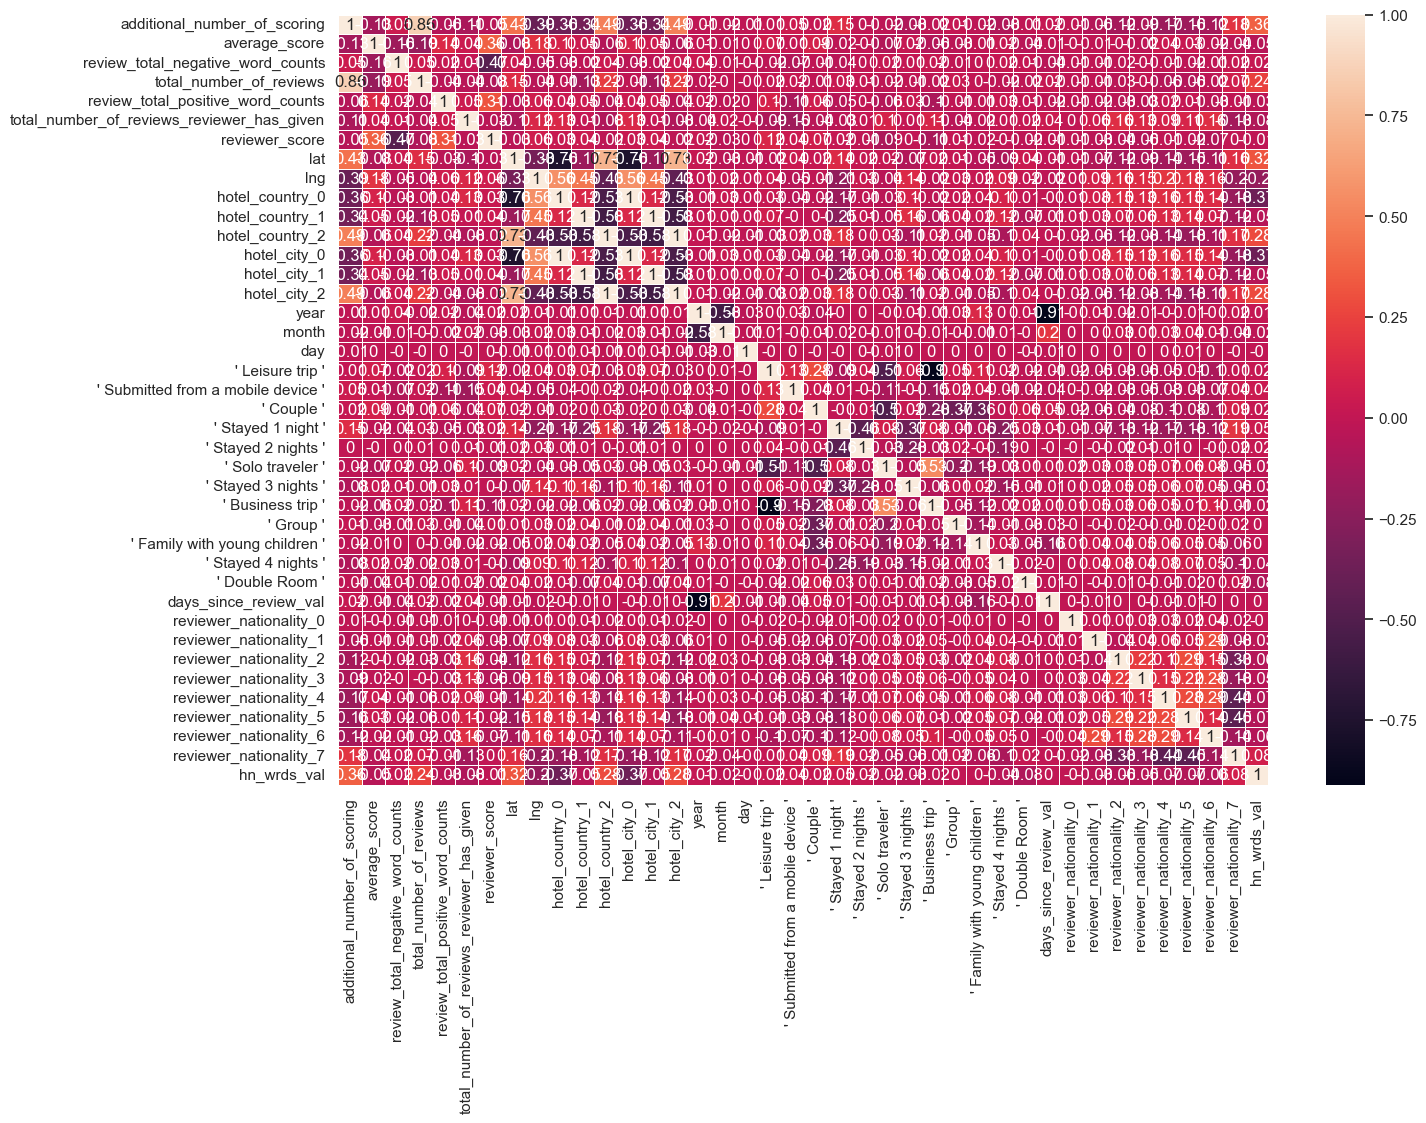

In [85]:
# построим матрицу корреляции, так как есть выбросы используем метод Спирмана
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(round(hotels.corr(method='spearman'),2), annot = True, linewidths=.5, ax=ax)

**Вывод по таблице корреляции:**
 - мы видим, что признаки 'total_number_of_reviews','lat','lng','year',"' Business trip '" имеют сильную корреляцию с другими признаками и по сути дублируют информацию 
 - мы должны будем удалить эти признаки после преобразования признаков negative_review и positive_review

In [86]:
#восстанавлием наши признаки object для дальнешего преобразования
hotels = hotels_cl.copy()


#### **Далее кодируем признаки negative_review и positive_review:**

In [87]:
#упрощаем неуникальные признаки для дальнейшего преобразования
hotels.loc[hotels.negative_review == 'No Negative', 'negative_review' ] = 'noneg'
hotels.loc[hotels.positive_review == 'No Positive', 'positive_review' ] = 'nopos'
#приводим отзывы к нижнему регистру
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: x.lower())
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: x.lower())

**pos_rev - условно позитивные отзывы**

In [88]:
#позитивные отзывы
pos_rev = hotels[hotels['review_total_negative_word_counts'] < hotels['review_total_positive_word_counts']]
pos_rev['reviewer_score'].describe()

count    203855.000000
mean          9.155101
std           1.057739
min           2.500000
25%           8.800000
50%           9.600000
75%          10.000000
max          10.000000
Name: reviewer_score, dtype: float64

**Среднее значение reviewer_score: 9.155101**

In [89]:
# средее количество слов в негативном отзыве
pos_rev_neg_num = pos_rev['negative_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(pos_rev_neg_num.mean())

7

In [90]:
# средее количество слов в негативном отзыве
pos_rev_pos_num = pos_rev['positive_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(pos_rev_pos_num.mean())

25

In [ ]:
def get_all_neg_wrds_list(df):
    """Функция возвращает весь список слов в negative_review

    Args:
        df (dataframe): dataframe

    Returns:
        list: result
    """
    result = list()
    for each in df['negative_review']:
        #
        result.extend(each.lower().split(' '))
    return result

#формируем список негативных слов
all_neg_wrds_list = get_all_neg_wrds_list(pos_rev) 
#формируем таблицу, чтобы оценить количество упоминаний
df_all_neg_wrds = pd.DataFrame(all_neg_wrds_list)
df_nwrds = df_all_neg_wrds[0].value_counts()
df_nwrds_val = pd.DataFrame(df_nwrds)
#формируем словарь из негативных слов и количество упоминаний
nwrds_dict = df_nwrds_val['count'].to_dict()
#множество негативных слов
nwrds_dict


In [ ]:
def get_all_pos_wrds_list(df):
    """Функция возвращает весь список слов в positive_review

    Args:
        df (dataframe): dataframe

    Returns:
        list: список позитивных слов
    """
    result = list()
    for each in df['positive_review']:
        #
        result.extend(each.lower().split(' '))
    return result
#формируем список позитивных слов
all_pos_wrds_list = get_all_pos_wrds_list(pos_rev) 
#формируем таблицу, чтобы оценить количество упоминаний
df_all_pos_wrds = pd.DataFrame(all_pos_wrds_list)
df_pwrds = df_all_pos_wrds[0].value_counts()
df_pwrds_val = pd.DataFrame(df_pwrds)
#формируем словарь из позитивных слов и количество упоминаний
pwrds_dict = df_pwrds_val['count'].to_dict()
pwrds_dict

In [93]:
#обнуляем в словаре неинформативные признаки
nwrds_dict['the'] = 0
nwrds_dict[''] = 0
nwrds_dict['was'] = 0
nwrds_dict['were'] = 0
nwrds_dict['had'] = 0
nwrds_dict['to'] = 0
#nwrds_dict['n'] = 0
#nwrds_dict['a'] = 0
nwrds_dict['and'] = 0
nwrds_dict['in'] = 0
nwrds_dict['of'] = 0
nwrds_dict['for'] = 0
nwrds_dict['i'] = 0
nwrds_dict['it'] = 0
nwrds_dict['for'] = 0
nwrds_dict['is'] = 0
nwrds_dict['we'] = 0
nwrds_dict['t'] = 0
nwrds_dict['at'] = 0
nwrds_dict['on'] = 0
#nwrds_dict['not'] = 0
nwrds_dict['but'] = 0
#nwrds_dict['none'] = 0
nwrds_dict['all'] = 0
#nwrds_dict['na'] = 0
nwrds_dict['at'] = 0
nwrds_dict['my'] = 0
nwrds_dict['so'] = 0
nwrds_dict['this'] = 0
nwrds_dict['from'] = 0
nwrds_dict['you'] = 0
nwrds_dict['they'] = 0
nwrds_dict['as'] = 0
nwrds_dict['be'] = 0
nwrds_dict['there'] = 0
nwrds_dict['with'] = 0
nwrds_dict['have'] = 0
nwrds_dict['that'] = 0
nwrds_dict['would'] = 0
nwrds_dict['could'] = 0
nwrds_dict['our'] = 0
nwrds_dict['when'] = 0
nwrds_dict['are'] = 0
nwrds_dict['too'] = 0
nwrds_dict['which'] = 0
nwrds_dict['didn'] = 0
nwrds_dict['out'] = 0
#nwrds_dict['bit'] = 0
#nwrds_dict['only'] = 0
#nwrds_dict['one'] = 0
nwrds_dict['if'] = 0
nwrds_dict['or'] = 0
nwrds_dict['an'] = 0
nwrds_dict['us'] = 0
nwrds_dict['been'] = 0
nwrds_dict['get'] = 0
nwrds_dict['did'] = 0
nwrds_dict['up'] = 0
#nwrds_dict['no'] = 0
#nwrds_dict['negative'] = 0
#nwrds_dict['nothing'] = 0
#nwrds_dict['Nothing'] = 0
nwrds_dict['s'] = 0
nwrds_dict['me'] = 0
#nwrds_dict['stay'] = 0
nwrds_dict['noneg'] = 0
nwrds_dict['by'] = 0
nwrds_dict['can'] = 0
nwrds_dict['about'] = 0
nwrds_dict['2'] = 0
nwrds_dict['other'] = 0
nwrds_dict['also'] = 0
nwrds_dict['just'] = 0
nwrds_dict['than'] = 0
nwrds_dict['much'] = 0
nwrds_dict['what'] = 0
nwrds_dict['asked'] = 0
nwrds_dict['two'] = 0
nwrds_dict['should'] = 0
nwrds_dict['do'] = 0
nwrds_dict['has'] = 0
nwrds_dict['having'] = 0
nwrds_dict['every'] = 0
nwrds_dict['same'] = 0
nwrds_dict['make'] = 0
nwrds_dict['where'] = 0
nwrds_dict['hear'] = 0
nwrds_dict['i'] = 0
nwrds_dict['it'] = 0
nwrds_dict['we'] = 0
nwrds_dict['there'] = 0
nwrds_dict['wasn'] = 0
nwrds_dict['hotel'] = 0
nwrds_dict['breakfast'] = 0
nwrds_dict['very'] = 0
nwrds_dict['rooms'] = 0
nwrds_dict['bathroom'] = 0
nwrds_dict['room'] = 0
nwrds_dict['bed'] = 0
nwrds_dict['staff'] = 0
nwrds_dict['shower'] = 0
nwrds_dict['bar'] = 0
nwrds_dict['some'] = 0
nwrds_dict['price'] = 0
nwrds_dict['wifi'] = 0
#nwrds_dict['night'] = 0
nwrds_dict['service'] = 0
nwrds_dict['coffee'] = 0
nwrds_dict['a'] = 0

In [94]:
df_all_neg_wrds_cnt = pd.DataFrame.from_dict(nwrds_dict, orient='index')
#выбираем топ 7, т.к это среднее количество слов в negative_review pos_rev
df_nwrds_top = df_all_neg_wrds_cnt.sort_values(by=0).tail(7)


In [95]:
#формируем список
nwrds_top_list = list(df_nwrds_top.index)
nwrds_top_list

['only', 'little', 'bit', 'small', 'no', 'not', 'nothing']

*positive_review*

In [96]:
#обнуляем неинформативные признаки в словаре
pwrds_dict[''] = 0
pwrds_dict['is'] = 0
pwrds_dict['and'] = 0
pwrds_dict['the'] = 0
pwrds_dict['The'] = 0
pwrds_dict['was'] = 0
pwrds_dict['were'] = 0
pwrds_dict['to'] = 0
pwrds_dict['a'] = 0
pwrds_dict['in'] = 0
pwrds_dict['of'] = 0
pwrds_dict['for'] = 0
pwrds_dict['with'] = 0
pwrds_dict['i'] = 0
#pwrds_dict['no'] = 0
#pwrds_dict['nothing'] = 0
pwrds_dict['we'] = 0
pwrds_dict['it'] = 0
pwrds_dict['from'] = 0
pwrds_dict['at'] = 0
pwrds_dict['on'] = 0
pwrds_dict['all'] = 0
pwrds_dict['you'] = 0
pwrds_dict['are'] = 0
pwrds_dict['so'] = 0
pwrds_dict['this'] = 0
pwrds_dict['had'] = 0
pwrds_dict['but'] = 0
pwrds_dict['our'] = 0
pwrds_dict['stay'] = 0
pwrds_dict['close'] = 0
pwrds_dict['as'] = 0
pwrds_dict['my'] = 0
#pwrds_dict['not'] = 0
#pwrds_dict['everything'] = 0
pwrds_dict['that'] = 0
pwrds_dict['there'] = 0
pwrds_dict['have'] = 0
pwrds_dict['they'] = 0
pwrds_dict['us'] = 0
pwrds_dict['would'] = 0
pwrds_dict['which'] = 0
#pwrds_dict['also'] = 0
pwrds_dict['t'] = 0
pwrds_dict['I'] = 0
pwrds_dict['We'] = 0
pwrds_dict['room'] = 0
pwrds_dict['rooms'] = 0
pwrds_dict['hotel'] = 0
#pwrds_dict['good'] = 0
pwrds_dict['breakfast'] = 0
#pwrds_dict['positive'] = 0
pwrds_dict['staff'] = 0
pwrds_dict['location'] = 0
pwrds_dict['very'] = 0
pwrds_dict['an'] = 0
pwrds_dict['s'] = 0
pwrds_dict['be'] = 0
pwrds_dict['bed'] = 0
pwrds_dict['service'] = 0
pwrds_dict['london'] = 0

In [97]:
#top 25 слов в позитивном отзыве pos_rev
df_all_pos_wrds_cnt = pd.DataFrame.from_dict(pwrds_dict, orient='index')
df_pwrds_top = df_all_pos_wrds_cnt.sort_values(by=0).tail(25) 

In [98]:
#формируем список позитивных слов
pwrds_top_list = list(df_pwrds_top.index)
pwrds_top_list

['fantastic',
 'city',
 'again',
 'comfy',
 'bar',
 'just',
 'also',
 'quiet',
 'walk',
 'amazing',
 'well',
 'not',
 'everything',
 'perfect',
 'really',
 'station',
 'lovely',
 'comfortable',
 'clean',
 'nice',
 'excellent',
 'helpful',
 'friendly',
 'good',
 'great']

**neg_rev - отрицательные отзывы**

In [99]:
#отрицательные отзывы
neg_rev = hotels[hotels['review_total_negative_word_counts'] > hotels['review_total_positive_word_counts']]
neg_rev['reviewer_score'].describe()

count    171050.000000
mean          7.493475
std           1.744893
min           2.500000
25%           6.300000
50%           7.500000
75%           8.800000
max          10.000000
Name: reviewer_score, dtype: float64

*вывод:* среднее значение reviewer_score у отрицательного отзыва - 7,49

In [100]:
# средее количество слов в негативном отзыве
neg_rev_neg_num = neg_rev['negative_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(neg_rev_neg_num.mean())

34

In [101]:
# средее количество слов в позитивном отзыве
neg_rev_pos_num = neg_rev['positive_review'].apply(lambda x: len(x.split(' '))) 
# среднее количество слов в negative_review pos_rev
round(neg_rev_pos_num.mean())

10

*negative_review*

In [ ]:
#формируем список негативных слов
all_neg_wrds_list_2 = get_all_neg_wrds_list(neg_rev) 

#формируем таблицу, чтобы оценить количество упоминаний
df_all_neg_wrds_2 = pd.DataFrame(all_neg_wrds_list_2)
df_nwrds_2 = df_all_neg_wrds_2[0].value_counts()
df_nwrds_val_2 = pd.DataFrame(df_nwrds_2)
#формируем словарь
nwrds_dict_2 = df_nwrds_val_2['count'].to_dict()
nwrds_dict_2

In [ ]:
#формируем список позитивных слов
all_pos_wrds_list_2 = get_all_pos_wrds_list(neg_rev) 
#фомируем таблицу, чтобы оценить количество упоминаний
df_all_pos_wrds_2 = pd.DataFrame(all_pos_wrds_list_2)
df_pwrds_2 = df_all_pos_wrds_2[0].value_counts()
df_pwrds_val_2 = pd.DataFrame(df_pwrds_2)
#формируем словарь
pwrds_dict_2 = df_pwrds_val_2['count'].to_dict()
pwrds_dict_2

In [104]:
#обнуляем менее информативные признаки
nwrds_dict_2['the'] = 0
nwrds_dict_2[''] = 0
nwrds_dict_2['was'] = 0
nwrds_dict_2['were'] = 0
nwrds_dict_2['had'] = 0
nwrds_dict_2['to'] = 0
nwrds_dict_2['n'] = 0
nwrds_dict_2['a'] = 0
nwrds_dict_2['and'] = 0
nwrds_dict_2['in'] = 0
nwrds_dict_2['of'] = 0
nwrds_dict_2['for'] = 0
nwrds_dict_2['is'] = 0
nwrds_dict_2['we'] = 0
nwrds_dict_2['t'] = 0
nwrds_dict_2['at'] = 0
nwrds_dict_2['on'] = 0
nwrds_dict_2['not'] = 0
nwrds_dict_2['but'] = 0
nwrds_dict_2['none'] = 0
nwrds_dict_2['all'] = 0
nwrds_dict_2['na'] = 0
nwrds_dict_2['at'] = 0
nwrds_dict_2['my'] = 0
nwrds_dict_2['so'] = 0
nwrds_dict_2['this'] = 0
nwrds_dict_2['from'] = 0
nwrds_dict_2['you'] = 0
nwrds_dict_2['they'] = 0
nwrds_dict_2['as'] = 0
nwrds_dict_2['be'] = 0
nwrds_dict_2['there'] = 0
nwrds_dict_2['with'] = 0
nwrds_dict_2['have'] = 0
nwrds_dict_2['that'] = 0
nwrds_dict_2['would'] = 0
nwrds_dict_2['could'] = 0
nwrds_dict_2['our'] = 0
nwrds_dict_2['when'] = 0
nwrds_dict_2['are'] = 0
nwrds_dict_2['too'] = 0
nwrds_dict_2['which'] = 0
nwrds_dict_2['didn'] = 0
nwrds_dict_2['out'] = 0
nwrds_dict_2['bit'] = 0
nwrds_dict_2['only'] = 0
nwrds_dict_2['one'] = 0
nwrds_dict_2['if'] = 0
nwrds_dict_2['or'] = 0
nwrds_dict_2['an'] = 0
nwrds_dict_2['us'] = 0
nwrds_dict_2['been'] = 0
nwrds_dict_2['get'] = 0
nwrds_dict_2['did'] = 0
nwrds_dict_2['up'] = 0
nwrds_dict['no'] = 0
nwrds_dict['negative'] = 0
nwrds_dict['nothing'] = 0
nwrds_dict_2['s'] = 0
nwrds_dict_2['me'] = 0
nwrds_dict_2['stay'] = 0
nwrds_dict['noneg'] = 0
nwrds_dict_2['by'] = 0
nwrds_dict_2['can'] = 0
nwrds_dict_2['about'] = 0
nwrds_dict_2['2'] = 0
nwrds_dict_2['other'] = 0
nwrds_dict_2['also'] = 0
nwrds_dict_2['just'] = 0
nwrds_dict_2['than'] = 0
nwrds_dict_2['much'] = 0
nwrds_dict_2['what'] = 0
nwrds_dict_2['asked'] = 0
nwrds_dict_2['two'] = 0
nwrds_dict_2['should'] = 0
nwrds_dict_2['do'] = 0
nwrds_dict_2['has'] = 0
nwrds_dict_2['having'] = 0
nwrds_dict_2['every'] = 0
nwrds_dict_2['same'] = 0
nwrds_dict_2['make'] = 0
nwrds_dict_2['where'] = 0
nwrds_dict_2['hear'] = 0
nwrds_dict_2['i'] = 0
nwrds_dict_2['we'] = 0
nwrds_dict_2['it'] = 0
nwrds_dict_2['wasn'] = 0
nwrds_dict_2['no'] = 0
#nwrds_dict_2['room'] = 0
#nwrds_dict_2['staff'] = 0
nwrds_dict_2['very'] = 0
nwrds_dict_2['hotel'] = 0
nwrds_dict_2['small'] = 0
#nwrds_dict_2['rooms'] = 0
#nwrds_dict_2['room'] = 0
nwrds_dict_2['little'] = 0
nwrds_dict_2['bit'] = 0
#nwrds_dict_2['bed'] = 0
#nwrds_dict_2['bathroom'] = 0
#nwrds_dict_2['night'] = 0
#nwrds_dict_2['shower'] = 0
#nwrds_dict_2['service'] = 0
#nwrds_dict_2['breakfast'] = 0
#nwrds_dict_2['reception'] = 0
#nwrds_dict_2['check'] = 0
nwrds_dict_2['day'] = 0
##nwrds_dict_2['floor'] = 0
nwrds_dict_2['some'] = 0
##nwrds_dict_2['water'] = 0
#nwrds_dict_2['price'] = 0
nwrds_dict_2['work'] = 0
nwrds_dict_2['door'] = 0
nwrds_dict_2['4'] = 0

In [105]:
#топ 34 негативных слов после отчистки
df_all_neg_wrds_cnt_2 = pd.DataFrame.from_dict(nwrds_dict_2, orient='index')
df_nwrds_top_2 = df_all_neg_wrds_cnt_2.sort_values(by=0).tail(34)


In [106]:
#список негативных слов в neg_rev
nwrds_top_list_2 = list(df_nwrds_top_2.index)
nwrds_top_list_2

['better',
 'got',
 'booked',
 'noise',
 'coffee',
 'told',
 'hot',
 'booking',
 'expensive',
 'air',
 'noisy',
 'price',
 'water',
 'really',
 'after',
 'floor',
 'check',
 'poor',
 'even',
 'reception',
 'bar',
 'time',
 'good',
 'more',
 'service',
 'shower',
 'like',
 'night',
 'bathroom',
 'bed',
 'rooms',
 'staff',
 'breakfast',
 'room']

*positive_review*

In [107]:
#обнуляем менее информативные признаки в словаре
pwrds_dict_2[''] = 0
pwrds_dict_2['is'] = 0
pwrds_dict_2['and'] = 0
pwrds_dict_2['the'] = 0
pwrds_dict_2['was'] = 0
pwrds_dict_2['were'] = 0
pwrds_dict_2['to'] = 0
pwrds_dict_2['a'] = 0
pwrds_dict_2['in'] = 0
pwrds_dict_2['of'] = 0
pwrds_dict_2['for'] = 0
pwrds_dict_2['with'] = 0
pwrds_dict_2['i'] = 0
pwrds_dict['no'] = 0
pwrds_dict['nothing'] = 0
pwrds_dict_2['we'] = 0
pwrds_dict_2['it'] = 0
pwrds_dict_2['from'] = 0
pwrds_dict_2['at'] = 0
pwrds_dict_2['on'] = 0
pwrds_dict_2['all'] = 0
pwrds_dict_2['you'] = 0
pwrds_dict_2['are'] = 0
pwrds_dict_2['so'] = 0
pwrds_dict_2['this'] = 0
pwrds_dict_2['had'] = 0
pwrds_dict_2['but'] = 0
pwrds_dict_2['our'] = 0
pwrds_dict_2['stay'] = 0
pwrds_dict_2['close'] = 0
pwrds_dict_2['as'] = 0
pwrds_dict_2['my'] = 0
pwrds_dict_2['not'] = 0
pwrds_dict['everything'] = 0
pwrds_dict_2['that'] = 0
pwrds_dict_2['there'] = 0
pwrds_dict_2['have'] = 0
pwrds_dict_2['they'] = 0
pwrds_dict_2['us'] = 0
pwrds_dict_2['would'] = 0
pwrds_dict_2['which'] = 0
pwrds_dict_2['also'] = 0
pwrds_dict_2['t'] = 0
pwrds_dict_2['i'] = 0
pwrds_dict_2['we'] = 0
pwrds_dict_2['very'] = 0
#pwrds_dict_2['good'] = 0
#pwrds_dict_2['great'] = 0
#pwrds_dict_2['friendly'] = 0
##pwrds_dict_2['nice'] = 0
#pwrds_dict_2['clean'] = 0
#pwrds_dict_2['helpful'] = 0
#pwrds_dict_2['comfortable'] = 0
#pwrds_dict_2['excellent'] = 0
#pwrds_dict_2['lovely'] = 0
#pwrds_dict_2['comfy'] = 0
#pwrds_dict_2['station'] = 0
#pwrds_dict_2['really'] = 0
#pwrds_dict_2['well'] = 0
#pwrds_dict_2['quiet'] = 0
pwrds_dict_2['nopos'] = 0

In [108]:
#Топ 10 позитивных слов
df_all_pos_wrds_cnt_2 = pd.DataFrame.from_dict(pwrds_dict_2, orient='index')
df_pwrds_top_2 = df_all_pos_wrds_cnt_2.sort_values(by=0).tail(10)

In [109]:
#формируем список позитивных слов
pwrds_top_list_2 = list(df_pwrds_top_2.index)
pwrds_top_list_2

['clean',
 'nice',
 'friendly',
 'breakfast',
 'hotel',
 'great',
 'room',
 'good',
 'staff',
 'location']

In [110]:
#формируем словарь негативных слов для создания признаков
neg_list = nwrds_top_list + nwrds_top_list_2
neg_set = set(neg_list)
neg_set_list = list(neg_set)
#количество уникальных слов
len(neg_set_list)

41

In [111]:
#формируем словарь позитивных слов для создания признаков
pos_list = pwrds_top_list + pwrds_top_list_2
pos_set = set(pos_list)
pos_set_list = list(pos_set)
#количество уникальных слов
len(pos_set_list)

30

In [112]:
#создаем признаки по словарю через OneHotCoding
for each in pos_set_list:
    hotels['p_'+each] = hotels['positive_review'].apply(contains, tag_name=each)


In [113]:
#создаем признаки по словарю через OneHotCoding
for each in neg_set_list:
    hotels[each] = hotels['negative_review'].apply(contains, tag_name=each)

In [114]:
#удаляем неинформативные признаки
hotels = hotels.drop(['total_number_of_reviews','lat','lng','year',"' Business trip '"], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 115 entries, hotel_address to noisy
dtypes: float64(2), int32(2), int64(102), object(9)
memory usage: 336.4+ MB


#### *Удаляем дубликаты и признаки object*

In [115]:

# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)


In [116]:
hotels

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,hotel_country_0,hotel_country_1,hotel_country_2,hotel_city_0,...,bathroom,nothing,like,better,service,hot,got,price,told,noisy
0,581,8.4,3,4,7,10.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,299,8.3,3,2,14,6.3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,32,8.9,6,0,14,7.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,7.5,0,11,8,10.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,914,8.5,4,20,10,9.6,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,9.0,0,10,10,8.8,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
386799,272,8.4,0,93,1,9.2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
386800,457,6.8,12,9,21,8.3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
386801,365,8.1,0,6,28,9.2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
print('Количество дубликатов: {}'.format(hotels[hotels.duplicated()].shape[0]))

# Удаляем дубликаты:
hotels = hotels.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(hotels.shape))

Количество дубликатов: 316
Размер таблицы после удаления дубликатов: (386487, 106)


#### *Обучение и тестирование модели*

In [118]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [119]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [120]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=128935, random_state=42)

In [121]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [122]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12307413948722966
